<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/jennlee/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

sales = pd.read_csv('/content/drive/MyDrive/co_note/project/data/sales.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# sales dataset 생성

In [47]:
customer.columns

Index(['customer_id', 'gender', 'birthdate', 'home_location',
       'first_join_date', 'age_join', 'age_now'],
      dtype='object')

In [6]:
transaction = pd.read_csv('/content/drive/MyDrive/co_note/project/data/transaction_final.csv')
customer = pd.read_csv('/content/drive/MyDrive/co_note/project/data/customer_final.csv')

In [ ]:
# Sort the transaction dataframe by customer_id and created_at
transaction.sort_values(by=['customer_id', 'created_at'], inplace=True)

# Calculate the 'sales' column
sales = pd.DataFrame(transaction.groupby(['customer_id', 'booking_id']).total_amount.unique() - transaction.groupby(['customer_id', 'booking_id']).shipment_fee.unique())

# Reset index to get 'customer_id' and 'booking_id' as columns
sales = sales.reset_index()

# Merge with the original transaction dataframe to include additional columns
sales = pd.merge(sales, transaction[['customer_id', 'booking_id', 'created_at', 'total_amount', 'promo_amount', 'shipment_fee']], on=['customer_id', 'booking_id'], how='left')

# Display the resulting dataset
sales.head()

In [53]:
# Merge with the original transaction dataframe to include additional columns
sales = pd.merge(sales, customer[['customer_id', 'gender', 'age_now', 'first_join_date']], on=['customer_id'], how='left')

In [56]:
sales.drop_duplicates(subset='booking_id', inplace=True)

In [54]:
sales.head()

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender,age_now,first_join_date
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,174717,3791,0,170926,M,36,2018-08-25
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,189939,4240,0,185699,M,36,2018-08-25
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,287523,0,0,287523,M,36,2018-08-25
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,359032,1472,0,357560,M,36,2018-08-25
4,3,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,205436,4746,5000,195690,M,36,2018-08-25


In [57]:
sales.shape

(852582, 10)

In [46]:
sales.booking_id.duplicated().sum()

0

In [14]:
1254578-401996

852582

In [ ]:
sales['sales'] = sales['total_amount'] - sales['promo_amount'] - sales['shipment_fee']

In [ ]:
sales.drop(axis=0, index=None, columns='0', inplace=True, errors='raise')

In [ ]:
sales.info()

In [58]:
# sale dataset 저장
file_path = '/content/drive/MyDrive/co_note/project/data/sales.csv'
sales.to_csv(file_path, index=False)

# sales 분석

In [59]:
display(sales.head(), sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852582 entries, 0 to 852581
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      852582 non-null  int64 
 1   booking_id       852582 non-null  object
 2   created_at       852582 non-null  object
 3   total_amount     852582 non-null  int64 
 4   promo_amount     852582 non-null  int64 
 5   shipment_fee     852582 non-null  int64 
 6   sales            852582 non-null  int64 
 7   gender           852582 non-null  object
 8   age_now          852582 non-null  int64 
 9   first_join_date  852582 non-null  object
dtypes: int64(6), object(4)
memory usage: 71.6+ MB


,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,gender,age_now,first_join_date
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,174717,3791,0,170926,M,36,2018-08-25
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,189939,4240,0,185699,M,36,2018-08-25
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,287523,0,0,287523,M,36,2018-08-25
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,359032,1472,0,357560,M,36,2018-08-25
4,3,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,205436,4746,5000,195690,M,36,2018-08-25


None

In [60]:
sales['created_at'] = pd.to_datetime(sales['created_at'])
sales['y_m'] = sales['created_at'].dt.to_period('M')

<ipython-input-60-3c8275dc2cd7>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales['y_m'] = sales['created_at'].dt.to_period('M')


In [64]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852582 entries, 0 to 852581
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      852582 non-null  int64              
 1   booking_id       852582 non-null  object             
 2   created_at       852582 non-null  datetime64[ns, UTC]
 3   total_amount     852582 non-null  int64              
 4   promo_amount     852582 non-null  int64              
 5   shipment_fee     852582 non-null  int64              
 6   sales            852582 non-null  int64              
 7   gender           852582 non-null  object             
 8   age_now          852582 non-null  int64              
 9   first_join_date  852582 non-null  object             
 10  y_m              852582 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), int64(6), object(3), period[M](1)
memory usage: 78.1+ MB


In [38]:
그래프 그리기: 월별로 그리되 연도 라인 6개로 각자.

,customer_id,booking_id,created_at,total_amount,promo_amount,shipment_fee,sales,y_m
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31,174717,3791,0,170926,2020-05
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26,189939,4240,0,185699,2022-06
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25,287523,0,0,287523,2021-07
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28,359032,1472,0,357560,2020-06
4,3,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10,205436,4746,5000,195690,2021-01


In [66]:
monthly_sales = sales.groupby(sales['y_m'])['sales'].sum()
monthly_sales

y_m
2016-06         630795
2016-07      152067080
2016-08      300527207
2016-09      424014477
2016-10      540388728
              ...     
2022-03    15546610108
2022-04    15817357632
2022-05    16125996954
2022-06    15391398000
2022-07    13618235309
Freq: M, Name: sales, Length: 74, dtype: int64

In [71]:
sales.booking_id.duplicated().sum()

0

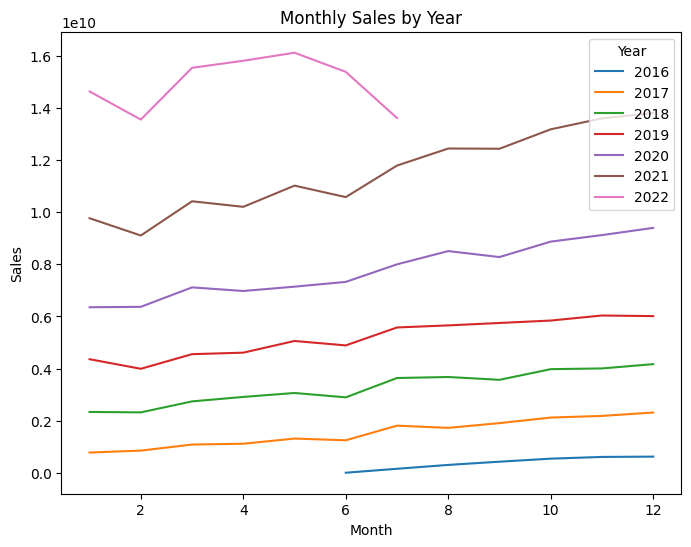

In [69]:
sales['year'] = sales['y_m'].dt.year
sales['month'] = sales['y_m'].dt.month

monthly_sales = sales.groupby(['year', 'month'])['sales'].sum().reset_index()

years = monthly_sales['year'].unique()

fig, ax = plt.subplots(figsize=(8, 6))

for year in years:
    year_data = monthly_sales[monthly_sales['year'] == year]
    ax.plot(year_data['month'], year_data['sales'], label=str(year))

ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales by Year')
ax.legend(title='Year')
plt.show()